<a href="https://colab.research.google.com/github/uiacap/ML_python/blob/main/ML_python_kmeans_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas -- A Python Library for Working with Data Frames**

Pandas is probably the most popular and convenient data wrangling library for

*   Python (official website: https://pandas.pydata.org)
*   Pandas stands for PANel-DAta-S.
*   Relativ similar to data frames in R
*   How is it different from NumPy arrays?
    *     Allows for heterogenous data (columns can have different data types)
    *     Adds some more convenient functions on top that are handy for data processing

**Loading Tabular Datasets from Text Files**

*   Here, we are working with structured data --that is, examples as rows and features as columns (in contrast: unstructured data such as text or images, etc.).
*   CSV stands for "comma separated values" (also common: TSV, tab seperated values)


*   We use the read_csv command to load the CSV file into a pandas data frame object f of the class DataFrame.

*   Data frames have a head command; here it shows the first 5 rows


In [1]:
#import the pandas
import pandas as pd

In [3]:
#download the dataset into local and then upload it into colab
from google.colab import files
upload = files.upload()

Saving mall_customers.csv to mall_customers.csv


# New section

In [7]:
#read the dataset
df = pd.read_csv('two_dim_data.txt', sep='\t')
#show the first five elements
df.head()

,x1,x2
0,0.77,-1.14
1,-0.33,1.44
2,0.91,-3.07
3,-0.37,-1.91
4,-0.63,-1.53


Convert pandas dataframe into numpy arrays

In [9]:
#convert pandas into numpy array
data = df.to_numpy()
data

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03],
       [ 1.8 ,  3.5 ],
       [ 2.1 ,  3.2 ],
       [ 3.21,  4.56],
       [ 2.52,  2.8 ],
       [ 3.32,  4.  ],
       [ 3.78,  2.  ],
       [ 3.8 ,  2.5 ],
       [ 4.2 ,  3.23],
       [ 4.52,  3.78],
       [ 4.32,  3.5 ]])

In [10]:
#show data
import matplotlib.pyplot as plt


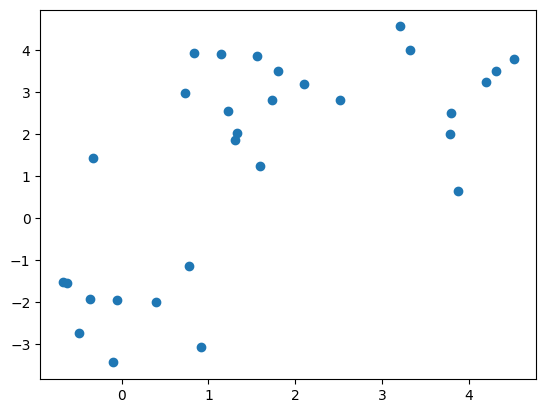

In [11]:
plt.scatter(data[:,0], data[:,1])

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    استفاده از <code>scikit-learn</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    الگوریتم <i>K میانگین</i> با نام <code>KMeans</code> در پکیج <code>cluster</code> این کتابخانه در دسترس است. برخی از آرگومان‌های مهم آن در جدول زیر آمده است، اما جهت مطالعه‌ی کامل‌تر مستندات می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>

In [26]:
#import KMeans form sklearn.cluster
from sklearn.cluster import KMeans
#create the object and initilize it

kmeans = KMeans(n_clusters=4)

#fit the model
kmeans.fit(data)

#get the lebels and centers
cl = kmeans.labels_
cl ==0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [28]:
kmeans.cluster_centers_

array([[-0.02777778, -2.14222222],
       [ 3.82      ,  1.71666667],
       [ 1.34923077,  2.77538462],
       [ 3.914     ,  3.814     ]])

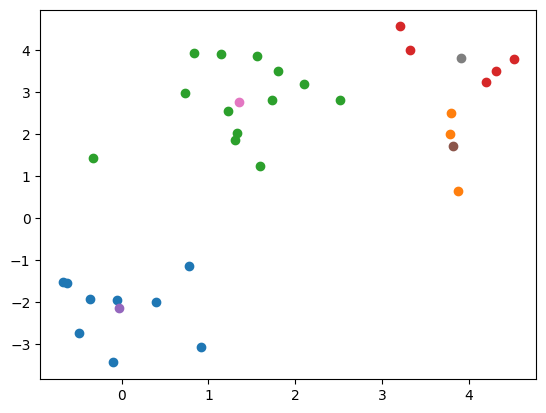

In [29]:
#show the different clusters and centers

n_cluster = 4
for c in range(n_cluster) :
  plt.scatter(data[cl==c,0],data[cl==c,1])

for x,y in kmeans.cluster_centers_ :
  plt.scatter(x,y)

In [34]:
#implement kmeans for the data of the houses
#read mal_customers.csv and show its first five data
df_mal = pd.read_csv('mall_customers.csv')
df_mal.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
#select 3 features only
features = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
df_mal_part = df_mal[features]
df_mal_part.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
#use kmeans to cluster the data into 5 cluster
mal_data = df_mal_part.to_numpy()

cost = []
for cluster_num in range(1,11) :
  mal_kmeans_model = KMeans(n_clusters=cluster_num)

  mal_kmeans_model.fit(mal_data)

  cost.append(mal_kmeans_model.inertia_)

#mal_clusters = mal_kmeans_model.labels_

In [54]:
cost

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75363.74835182932,
 58314.524775224774,
 51118.839039127066,
 44307.87341670446,
 41500.17061523748,
 37796.236856206124]

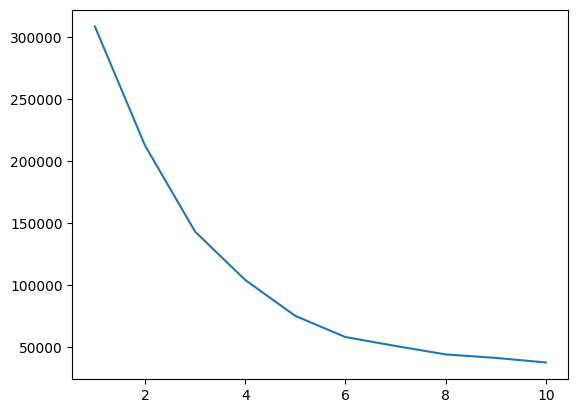

In [56]:
plt.plot(range(1,11), cost)

In [ ]:
#predict the label for [10,19,10]

In [ ]:
#use the elbow diagram to find the optimum number of clusters
#use kmeans.inertia_ to compute the cost of the cluster


In [57]:
cluster_num = 6
mal_kmeans_model = KMeans(n_clusters=cluster_num)
mal_kmeans_model.fit(mal_data)

mal_clusters = mal_kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


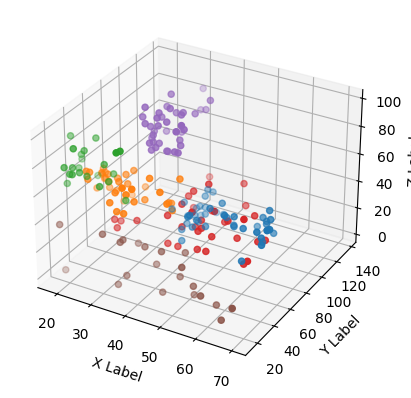

In [58]:
#make a 3d plot
# for more help see : https://www.scaler.com/topics/matplotlib/matplotlib-3d-plot/
from mpl_toolkits.mplot3d import Axes3D

# Defining the axes as 3D
ax = plt.axes(projection='3d')

# Create a 3D scatter plot
for i in range(cluster_num) :
  ax.scatter(mal_data[mal_clusters == i ,0],mal_data[mal_clusters == i,1],
             mal_data[mal_clusters ==i,2])


# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

PCA

In [ ]:
#import PCA
from sklearn.decomposition import PCA


In [ ]:
#initilize the pca with 2 component

#fit the data: get the 2 first principle component

In [ ]:
#plot the clustering in 2 dimension


(200, 2)
